Found 630 images belonging to 21 classes.
Found 1470 images belonging to 21 classes.
Epoch 1/5
46/46 [==============================] - 30s 494ms/step - loss: 1.3341 - categorical_accuracy: 0.2545 - val_loss: 0.9645 - val_categorical_accuracy: 0.6762
Epoch 2/5
46/46 [==============================] - 19s 416ms/step - loss: 0.7289 - categorical_accuracy: 0.8161 - val_loss: 0.8176 - val_categorical_accuracy: 0.7571
Epoch 3/5
46/46 [==============================] - 19s 414ms/step - loss: 0.6473 - categorical_accuracy: 0.8459 - val_loss: 0.8152 - val_categorical_accuracy: 0.7444
Epoch 4/5
46/46 [==============================] - 19s 416ms/step - loss: 0.5361 - categorical_accuracy: 0.9113 - val_loss: 0.8284 - val_categorical_accuracy: 0.7508
Epoch 5/5
46/46 [==============================] - 19s 409ms/step - loss: 0.6223 - categorical_accuracy: 0.8637 - val_loss: 0.7107 - val_categorical_accuracy: 0.8016


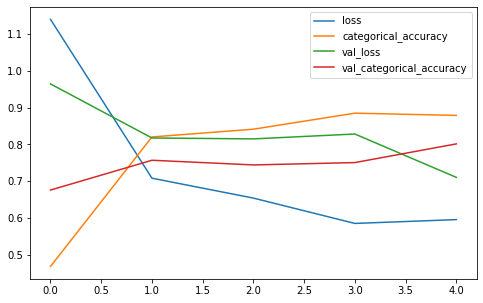

In [1]:
#Here, we'll add image augmentation into our transfer learning approach
#to see if we can get more accuracy!  The fundamental idea of image
#augmentation is that, by flipping and recoloring our imagery, 
#we can show our model more views of the same thing than our data
#itself supports.

import keras
import pandas as pd
import tensorflow_hub as hub
from matplotlib import pyplot as plt

#Image augmentation is done through the ImageDataGenerator in Keras.
#You can see all of the different ImageDataGenerator options here: https://keras.io/api/preprocessing/image/#imagedatagenerator-class
dataGenerator = keras.preprocessing.image.ImageDataGenerator(validation_split=0.3, 
                                                             samplewise_center=True, 
                                                             fill_mode="nearest",
                                                             rotation_range=360,#Because we're using satellite data, let's allow 360 degree rotations.
                                                             brightness_range=[0.5,1.5],#Arbitrary range of brightness
                                                             horizontal_flip=True,#Randomly horizontal flip
                                                             vertical_flip=True #Random vertical flip
                                                             )


test = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', 
                                            batch_size=32, subset="validation", 
                                            target_size=(224,224))                                       
train = dataGenerator.flow_from_directory("./mercerImages", class_mode='categorical', 
                                        batch_size=32, subset="training", 
                                        target_size=(224,224))
model = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/feature_vector/1",
                   trainable=True),  
    keras.layers.Dense(21, activation='softmax')
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1),
                                            loss='categorical_hinge',
                                            metrics=['categorical_accuracy'])


#Note that image augmentation will require more epochs to reasonably fit,
#as the amount of data going in is now higher!
modelHistory = model.fit(train, epochs=15, validation_data=test)

pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
plt.show()